# **Deep Learning - Handwritting Digit Recognition using CNN**

**IMPORTING**

In [152]:
import keras
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import RMSprop
from matplotlib import pyplot as plt
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 20

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


**PREPROCESSING**

In [153]:
import keras
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop

batch_size = 128
num_classes = 10
epochs = 20

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

num_of_trainImgs = x_train.shape[0] #60000 here
num_of_testImgs = x_test.shape[0] #10000 here
img_width = 28
img_height = 28
 
x_train = x_train.reshape(x_train.shape[0], img_height, img_width, 1)
x_test = x_test.reshape(x_test.shape[0], img_height, img_width, 1)
input_shape = (img_height, img_width, 1)
 
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# convert class vectors to binary class matrices
num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

Create CNN model

In [155]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
optimizer=RMSprop(),
metrics=['accuracy'])
history = model.fit(x_train, y_train,
batch_size=batch_size,
epochs=epochs,
verbose=1,
validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_26 (Dropout)         (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_36 (Dense)             (None, 128)               1179776   
_________________________________________________________________
dropout_27 (Dropout)         (None, 128)             

In [156]:
model.save('trained_model.h5')
files.download('trained_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Handwritten Digit Recognition 

In [61]:
import cv2
width = 640
height = 480
cameraNo = 0

#Video Capture
cap = cv2.VideoCapture(cameraNo) 
cap.set(3,width)
cap.set(4,height)

import numpy as np
from skimage import img_as_ubyte    
from skimage.color import rgb2gray
from keras.models import load_model

model = load_model('trained_model.h5')


In [ ]:
while True:
	success, img_original = cap.read()
	img_gray = rgb2gray(img_original)


	img_gray_u8 = img_as_ubyte(img_gray)
	#cv2.imshow("Window", img_gray_u8)
	
	#Convert grayscale image to binary
	(thresh, im_binary) = cv2.threshold(img_gray_u8, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
	

	img_resized = cv2.resize(im_binary,(28,28))

	#invert image
	im_gray_invert = 255 - img_resized
	cv2.imshow("invert image", im_gray_invert)

	im_final = im_gray_invert.reshape(1,28,28,1)



	ans = model.predict(im_final)
	ans = np.argmax(ans,axis=1)[0]
	print(ans)


	cv2.putText(img_original,'Predicted Digit : '+str(ans),
                    (50,50),cv2.FONT_HERSHEY_COMPLEX,
                    1,(0,0,255),1)

	cv2.imshow("Original Image",img_original)
	if cv2.waitKey(1) and 0xFF == ord('q'):
		break
        
cap.release()
cv2.destroyAllWindows()

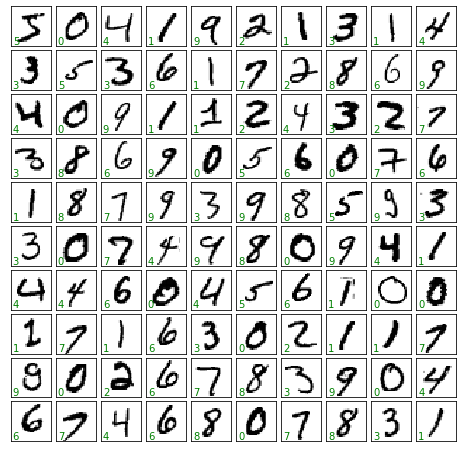

In [23]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

import matplotlib.pyplot as plt
fig, axes = plt.subplots(10, 10, figsize=(8, 8), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(x_train[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_train[i]),transform=ax.transAxes, color='green')
plt.show()
